<a href="https://colab.research.google.com/github/paolayela/Talento-TECH/blob/main/ejercicio2_CNN_mision2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-image
import skimage

<class 'numpy.ndarray'>
(512, 512)


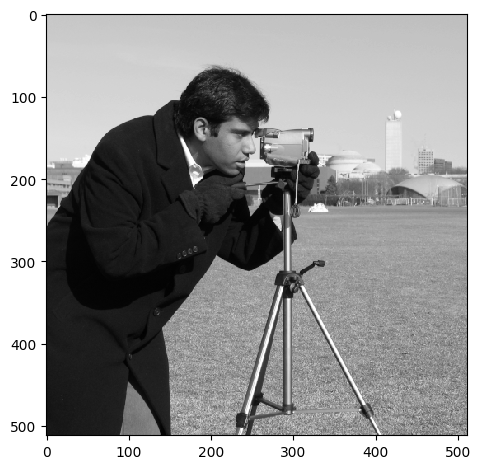

In [ ]:
#cargar imagenes
camara=skimage.data.camera()

#explorar imagenes
print(type(camara))
print(camara.shape)

#mostrar mi imagen
skimage.io.imshow(camara)
skimage.io.show()

<class 'numpy.ndarray'>
(512, 512, 3)


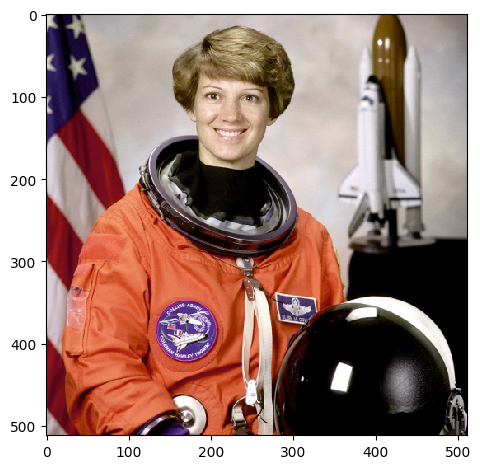

In [ ]:
astronauta=skimage.data.astronaut()

print(type(astronauta))
print(astronauta.shape)

skimage.io.imshow(astronauta)
skimage.io.show()

(296, 400, 3)
<class 'numpy.ndarray'>


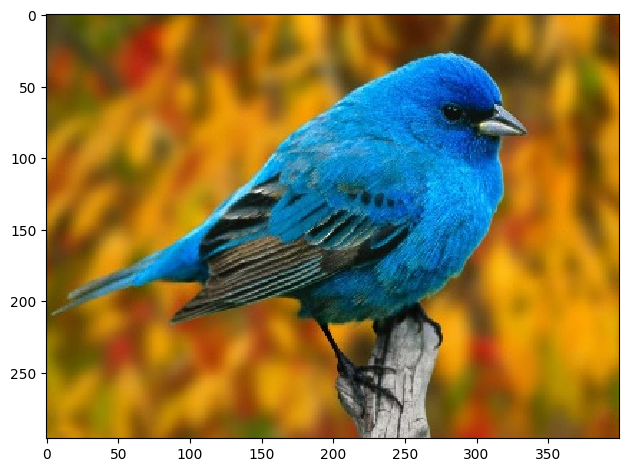

In [ ]:
#ruta de la imagen
imagen='pajaro1.jpg'

pajaro=skimage.io.imread(imagen)

print(pajaro.shape)
print(type(pajaro))

skimage.io.imshow(pajaro)
skimage.io.show()

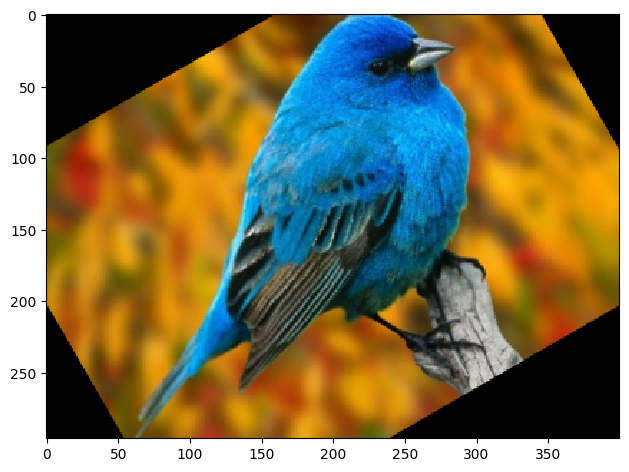

In [ ]:
#rotacion de imagen
rotacion=skimage.transform.rotate(pajaro,angle=30)

skimage.io.imshow(rotacion)
skimage.io.show()

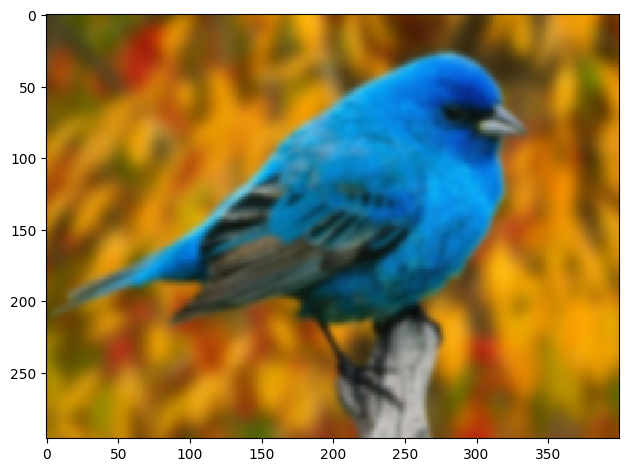

In [ ]:
#Aplicar un filtro Gaussiano para suavizar la imagen
filtro=skimage.filters.gaussian(pajaro,sigma=2)

skimage.io.imshow(filtro)
skimage.io.show()

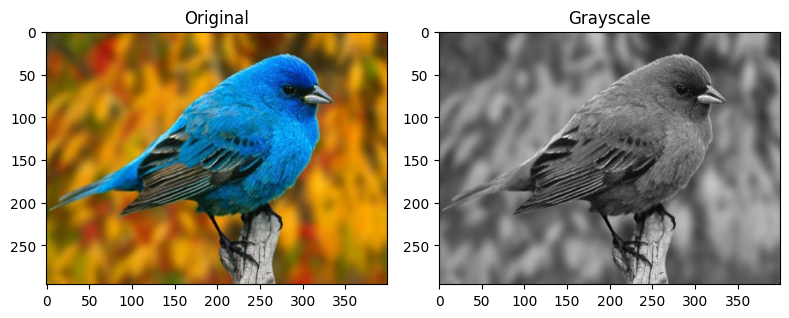

In [ ]:
import matplotlib.pyplot as plt
# Convertir la imagen filtrada a escala de grises
pajaro_gris = skimage.color.rgb2gray(pajaro)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(pajaro)
ax[0].set_title("Color")
ax[1].imshow(pajaro_gris, cmap=plt.cm.gray)
ax[1].set_title("Gris")

fig.tight_layout()
plt.show()



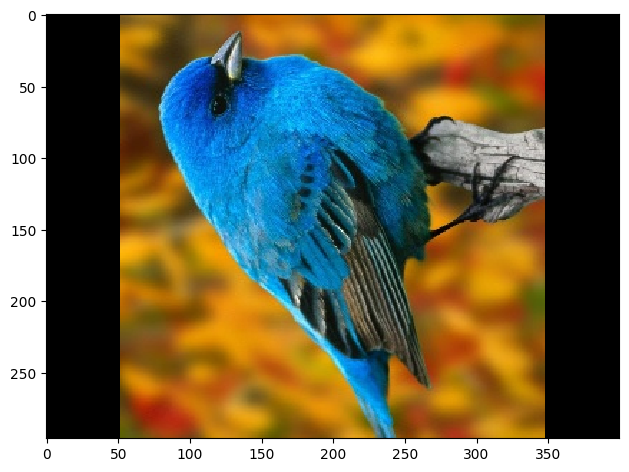

In [ ]:
#rotacion de 90 grados
rotacion2=skimage.transform.rotate(pajaro,90)

skimage.io.imshow(rotacion2)
skimage.io.show()

(296, 400, 3)


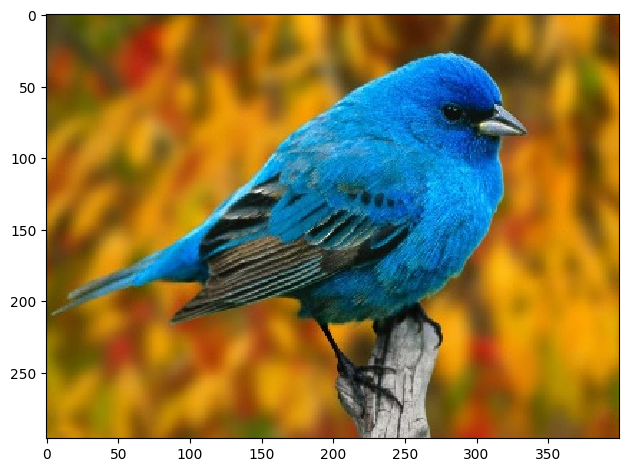

(148, 200, 3)


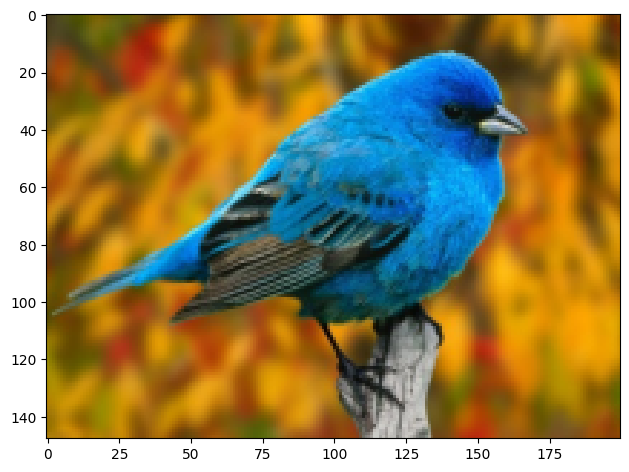

In [ ]:
#Escalar la imagen en 50% de la imagen original

#anti_aliasing=True El suavizado ayuda a reducir los artefactos visuales y el aliasing que pueden ocurrir cuando se reduce el tamaño de la imagen
escalar=skimage.transform.rescale(pajaro, 0.5, channel_axis=2) # Conserva los canales de color durante el cambio de escala


print(pajaro.shape)
skimage.io.imshow(pajaro)
skimage.io.show()

print(escalar.shape)
skimage.io.imshow(escalar)
skimage.io.show()

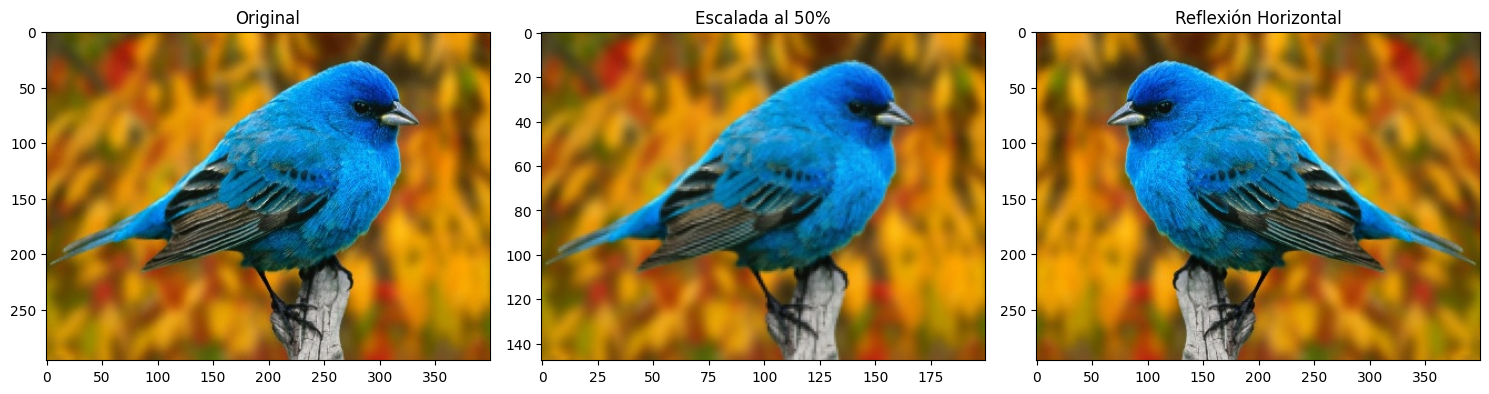

In [ ]:
import numpy as np

#Reflexion horizontal
reflexion_horizontal = np.fliplr(pajaro)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()
ax[0].imshow(pajaro, cmap=plt.cm.gray)
ax[0].set_title("Original")
ax[1].imshow(escalar, cmap=plt.cm.gray)
ax[1].set_title("Escalada al 50%")
ax[2].imshow(reflexion_horizontal, cmap=plt.cm.gray)
ax[2].set_title("Reflexión Horizontal")

# Ajustar el layout de la figura para evitar solapamientos
fig.tight_layout()

# Mostrar la figura con los subplots
plt.show()


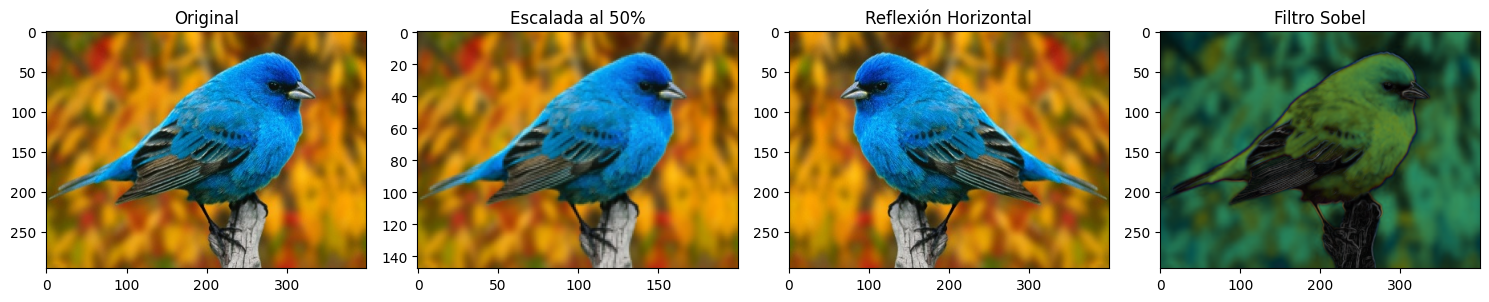

In [ ]:
#filtro sobel

bordes = skimage.filters.sobel(pajaro)

#crear una figura con 4 subplots
fig,axes=plt.subplots(1,4, figsize=(15,5))
ax=axes.ravel()

ax[0].imshow(pajaro)
ax[0].set_title("Original")
ax[1].imshow(escalar)
ax[1].set_title("Escalada al 50%")
ax[2].imshow(reflexion_horizontal)
ax[2].set_title("Reflexión Horizontal")
ax[3].imshow(bordes)
ax[3].set_title("Filtro Sobel")

#ajustar el layout de la figura para evitar solapamientos
fig.tight_layout()

#mostrar la figura con los subplots
plt.show()

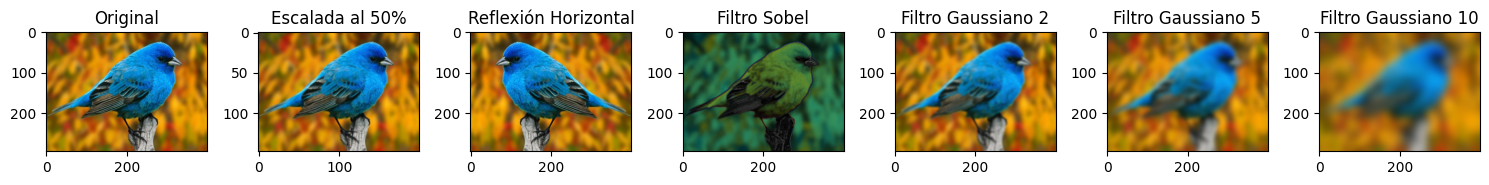

In [ ]:
bordes_gau=skimage.filters.gaussian(pajaro, sigma=2)
bordes_gau2=skimage.filters.gaussian(pajaro, sigma=5)
bordes_gau3=skimage.filters.gaussian(pajaro, sigma=10)

#crear una figura
fig, axes= plt.subplots(1,7 , figsize=(15,5))
ax=axes.ravel()

ax[0].imshow(pajaro)
ax[0].set_title("Original")
ax[1].imshow(escalar)
ax[1].set_title("Escalada al 50%")
ax[2].imshow(reflexion_horizontal)
ax[2].set_title("Reflexión Horizontal")
ax[3].imshow(bordes)
ax[3].set_title("Filtro Sobel")
ax[4].imshow(bordes_gau)
ax[4].set_title("Filtro Gaussiano 2")
ax[5].imshow(bordes_gau2)
ax[5].set_title("Filtro Gaussiano 5")
ax[6].imshow(bordes_gau3)
ax[6].set_title("Filtro Gaussiano 10")

#ajustar layaut
fig.tight_layout()

plt.show()


<ipython-input-38-0efe9478fbf2>:2: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (296, 400, 3) looks like that of an RGB image.
  umbral = skimage.filters.threshold_otsu(pajaro)


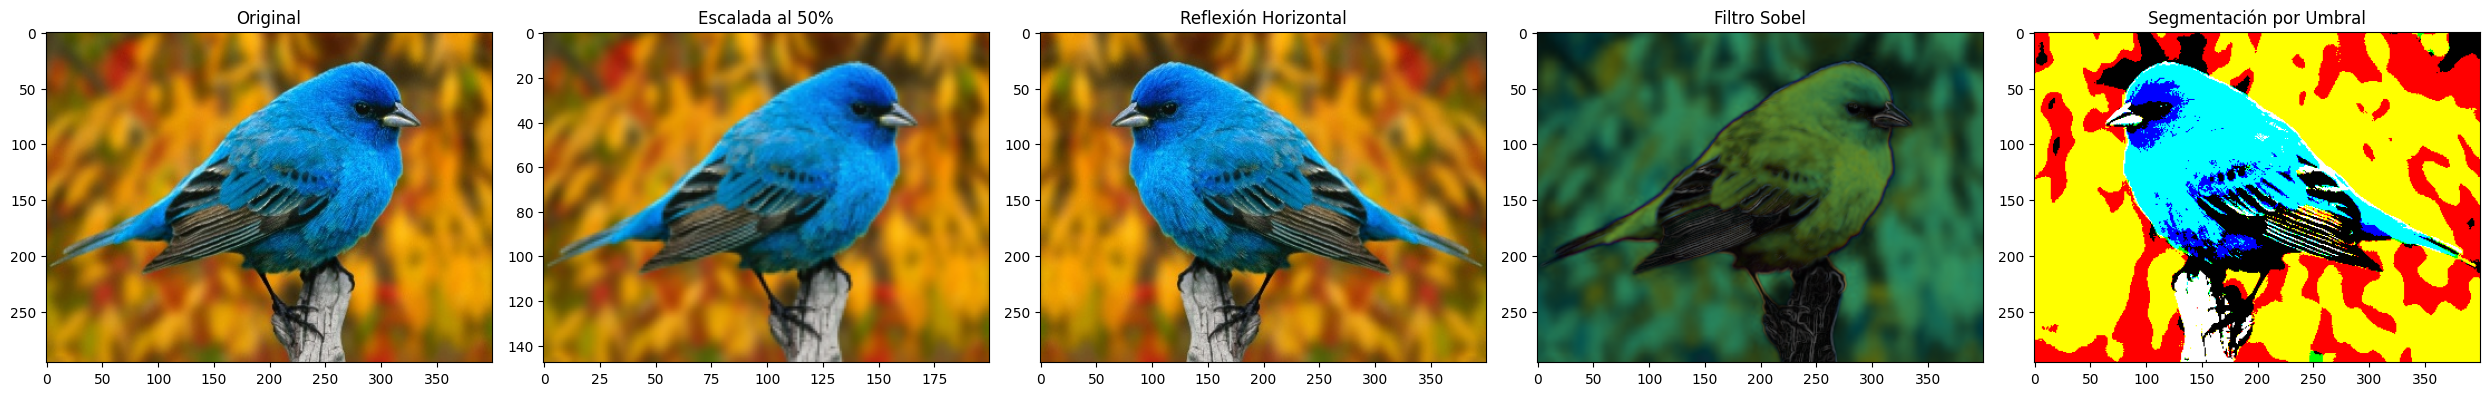

In [ ]:
# Calcular el umbral utilizando el método de Otsu
umbral = skimage.filters.threshold_otsu(pajaro)

# Crear una imagen binaria aplicando el umbral
imagen_segmentada = reflexion_horizontal > umbral

# Convertir la imagen binaria a tipo uint8 (0 o 255)
imagen_segmentada = imagen_segmentada.astype(np.uint8) * 255

# Crear una figura con cinco subplots
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
ax = axes.ravel()

# Mostrar la imagen original en escala de grises en el primer subplot
ax[0].imshow(pajaro, cmap=plt.cm.gray)
ax[0].set_title("Original")

# Mostrar la imagen escalada en el segundo subplot
ax[1].imshow(escalar, cmap=plt.cm.gray)
ax[1].set_title("Escalada al 50%")

# Mostrar la imagen reflejada horizontalmente en el tercer subplot
ax[2].imshow(reflexion_horizontal, cmap=plt.cm.gray)
ax[2].set_title("Reflexión Horizontal")

# Mostrar la imagen con el filtro de borde Sobel en el cuarto subplot
ax[3].imshow(bordes, cmap=plt.cm.gray)
ax[3].set_title("Filtro Sobel")

# Mostrar la imagen segmentada en el quinto subplot
ax[4].imshow(imagen_segmentada, cmap=plt.cm.gray) # Now 'imagen_segmentada' is displayable
ax[4].set_title("Segmentación por Umbral")

# Ajustar el layout de la figura para evitar solapamientos
fig.tight_layout()

# Mostrar la figura con los subplots
plt.show()

In [ ]:
# Definir el elemento estructurante para las operaciones morfológicas
selem = skimage.morphology.square(3)

# Aplicar erosión
erosion = skimage.morphology.erosion(imagen_segmentada, selem=selem)

# Aplicar dilatación
dilatacion = skimage.morphology.dilation(imagen_segmentada, selem=selem)

# Aplicar apertura (erosión seguida de dilatación)
apertura = skimage.morphology.opening(imagen_segmentada, selem=selem)

# Aplicar cierre (dilatación seguida de erosión)
cierre = skimage.morphology.closing(imagen_segmentada, selem=selem)

# Crear una figura con siete subplots
fig, axes = plt.subplots(1, 7, figsize=(35, 5))
ax = axes.ravel()

# Mostrar la imagen original en escala de grises en el primer subplot
ax[0].imshow(pajaro, cmap=plt.cm.gray)
ax[0].set_title("Original")

# Mostrar la imagen escalada en el segundo subplot
ax[1].imshow(escalar, cmap=plt.cm.gray)
ax[1].set_title("Escalada al 50%")

# Mostrar la imagen reflejada horizontalmente en el tercer subplot
ax[2].imshow(reflexion_horizontal, cmap=plt.cm.gray)
ax[2].set_title("Reflexión Horizontal")

# Mostrar la imagen con el filtro de borde Sobel en el cuarto subplot
ax[3].imshow(bordes, cmap=plt.cm.gray)
ax[3].set_title("Filtro Sobel")

# Mostrar la imagen segmentada en el quinto subplot
ax[4].imshow(imagen_segmentada, cmap=plt.cm.gray)
ax[4].set_title("Segmentación por Umbral")

# Mostrar la imagen con erosión en el sexto subplot
ax[5].imshow(erosion, cmap=plt.cm.gray)
ax[5].set_title("Erosión")

# Mostrar la imagen con dilatación en el séptimo subplot
ax[6].imshow(dilatacion, cmap=plt.cm.gray)
ax[6].set_title("Dilatación")

# Crear una figura con dos subplots para apertura y cierre
fig2, axes2 = plt.subplots(1, 2, figsize=(10, 5))
ax2 = axes2.ravel()

# Mostrar la imagen con apertura en el primer subplot
ax2[0].imshow(apertura, cmap=plt.cm.gray)
ax2[0].set_title("Apertura")

# Mostrar la imagen con cierre en el segundo subplot
ax2[1].imshow(cierre, cmap=plt.cm.gray)
ax2[1].set_title("Cierre")

# Ajustar el layout de las figuras para evitar solapamientos
fig.tight_layout()
fig2.tight_layout()

# Mostrar las figuras con los subplots
plt.show()

<ipython-input-42-e864cb4468c8>:8: FutureWarning: `selem` is a deprecated argument name for `erosion`. It will be removed in version 1.0. Please use `footprint` instead.
  erosion = skimage.morphology.erosion(imagen_segmentada, selem=selem)


RuntimeError: sequence argument must have length equal to input rank